In [1]:
import os
import xml.etree.ElementTree as ET
import json
import matplotlib.pyplot as plt


In [2]:
def parse_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Lấy tên ảnh
    filename = root.find('filename').text
    
    # Lấy danh sách các đối tượng
    objects = []
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        width = xmax - xmin
        height = ymax - ymin
        area = width * height  # Diện tích của bounding box
        
        objects.append({
            "name": obj_name,
            "bounding_box": {
                "xmin": xmin,
                "ymin": ymin,
                "xmax": xmax,
                "ymax": ymax
            },
            "area": area
        })
    
    # Tìm object lớn nhất và nhỏ nhất dựa trên diện tích bounding box
    if objects:
        largest_object_area = max(obj['area'] for obj in objects)
        smallest_object_area = min(obj['area'] for obj in objects)
    else:
        largest_object_area = None
        smallest_object_area = None

    return {
        "filename": filename,
        "num_objects": len(objects),
        "objects": [
            {
                "name": obj["name"]
            } for obj in objects
        ],
        "bounding_boxes": [
            {
                "name": obj["name"],
                "bounding_box": obj["bounding_box"]
            } for obj in objects
        ],
        "largest_object_size": largest_object_area,
        "smallest_object_size": smallest_object_area
    }


In [3]:
def process_folder(folder_path):
    data = []
    num_objects_list = []
    
    # Duyệt qua tất cả các file trong thư mục
    index = 1
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xml'):
            file_path = os.path.join(folder_path, file_name)
            image_data = parse_xml(file_path)
            image_data["index"] = index  # Thêm số thứ tự
            data.append(image_data)
            num_objects_list.append(image_data['num_objects'])
            index += 1
    
    return data, num_objects_list


In [4]:
def save_to_json(data, output_file):
    # Xuất dữ liệu ra file JSON
    with open(output_file, 'w') as json_file:
        json.dump({"images": data}, json_file, indent=4)


In [5]:
def plot_distribution(num_objects_list):
    # Vẽ biểu đồ phân phối số lượng object
    plt.figure(figsize=(8, 6))
    plt.hist(num_objects_list, bins=range(1, max(num_objects_list) + 2), edgecolor='black')
    plt.title('Distribution of Number of Objects per Image')
    plt.xlabel('Number of Objects')
    plt.ylabel('Frequency')
    plt.xticks(range(1, max(num_objects_list) + 1))
    plt.grid(True)
    plt.show()


In [6]:
# Đường dẫn đến thư mục chứa file XML và file JSON đầu ra
folder_path = r'C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\Annotations'  # Thay thế bằng đường dẫn thư mục chứa các file XML
output_file = r'C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\annotation.json'

# Xử lý thư mục và lưu kết quả ra file JSON
data, num_objects_list = process_folder(folder_path)
save_to_json(data, output_file)

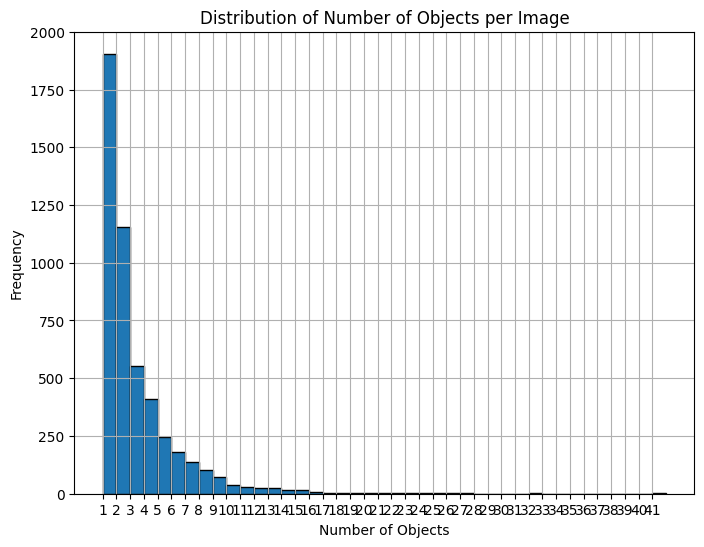

Dữ liệu đã được lưu vào C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\annotation.json


In [7]:
# Vẽ biểu đồ phân phối số lượng object
plot_distribution(num_objects_list)

print(f"Dữ liệu đã được lưu vào {output_file}")